In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from qiskit import Aer, QuantumCircuit
# from qiskit.opflow import Z, I, StateFn
# from qiskit.utils import QuantumInstance
# from qiskit.circuit import Parameter
# from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap, PauliFeatureMap
# from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, ADAM, SPSA


import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# from qiskit_machine_learning.algorithms.objective_functions import OneHotObjectiveFunction
# from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
# from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
# from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR

from typing import Union

# from qiskit_machine_learning.exceptions import QiskitMachineLearningError

from IPython.display import clear_output

from sklearn.feature_extraction import DictVectorizer

from array import array

from matplotlib.ticker import FuncFormatter

plt.rcParams.update({'figure.max_open_warning': 0})

In [6]:
def plotObjFuncAll(data, case_name):
    obj_funcs = []
    names = []
    for index, row in data.iterrows():
        obj_values = eval(row['Objective Function Values Evolution'])
        if case_name.startswith("SPSA"):
            obj_funcs.append(obj_values[51::2])
        else:
            obj_funcs.append(obj_values)
        names.append(row['Name'])
    fig, ax = plt.subplots(figsize=(6,4))
    
    number_of_plots = len(obj_funcs)
#     colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
#     ax.set_prop_cycle('color', [colormap(i) for i in np.linspace(0, 1,number_of_plots)])
    
    lines = []
    for index, obj_values in enumerate(obj_funcs):
        ax.set_xlabel("Krok algorytmu optymalizacji")
        ax.set_ylabel("Wartość funkcji celu")
        x_values = list(range(0, len(obj_values)))
        plt.plot(x_values, obj_values, label= names[index])
        
    ax.legend(loc = "upper right")
    plt.savefig('../images/results/' + case_name + '_COST.pdf')
        

def plotAccuracyAll(data, case_name):
    accuracies = []
    names = []
    
    for index, row in data.iterrows():
        accuracy = eval(row['Accuracy Evolution'])
#         print(row['Name'], accuracy[-1])
        if case_name.startswith("SPSA"):
            accuracies.append(accuracy[51::2])
        else:
            accuracies.append(accuracy)
        names.append(row['Name'])    
        
    fig, ax = plt.subplots(figsize=(6,4))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    
    number_of_plots = len(accuracies)
#     colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
#     ax.set_prop_cycle('color', [colormap(i) for i in np.linspace(0, 1,number_of_plots)])
    
    for index, accuracy in enumerate(accuracies):
        ax.set_xlabel("Krok algorytmu optymalizacji")
        ax.set_ylabel("Dokładność modelu na zbiorze testowym")
        x_values = list(range(0, len(accuracy)))
        plt.plot(x_values, accuracy, label= names[index])
        
    ax.legend(loc = "lower right")
    plt.savefig('../images/results/' + case_name + '_ACCU.pdf')

In [7]:
def readData(DATA_PATH = "./data/SPSA_PAULI.csv"):
    """
    Normalizes the data
    """
    # Reads the data
    data = pd.read_csv(DATA_PATH)
    
    return data

data = readData()
for index, row in data.iterrows():
        obj_func = eval(row['Objective Function Values Evolution'])
        accuracy = eval(row['Accuracy Evolution'])
        name = row['Name']
        print(len(obj_func))

451
451
451
451
451
451
451
451
451


In [8]:
cases = ["COBYLA_Z", "COBYLA_ZZ", "COBYLA_PAULI", "SPSA_Z", "SPSA_ZZ", "SPSA_PAULI", "SLSQP_Z", "SLSQP_ZZ", "SLSQP_PAULI"]

COBYLA200-ZFeature1-RealAmplitudes1 145.96217389678472 0.5333333333333333
COBYLA200-ZFeature1-RealAmplitudes2 137.36072601232925 0.6222222222222222
COBYLA200-ZFeature1-RealAmplitudes4 129.58947559003425 0.6222222222222222
COBYLA200-ZFeature2-RealAmplitudes1 120.18837326933637 0.8888888888888888
COBYLA200-ZFeature2-RealAmplitudes2 116.54382293633559 0.5111111111111111
COBYLA200-ZFeature2-RealAmplitudes4 120.71750656813207 0.6666666666666666
COBYLA200-ZFeature4-RealAmplitudes1 97.36018712455201 0.6666666666666666
COBYLA200-ZFeature4-RealAmplitudes2 102.77040939656213 0.5555555555555556
COBYLA200-ZFeature4-RealAmplitudes4 102.80671849215527 0.9333333333333333
COBYLA200-ZZFeature1-RealAmplitudes1 112.6327700806795 0.6666666666666666
COBYLA200-ZZFeature1-RealAmplitudes2 90.52995851851394 0.8888888888888888
COBYLA200-ZZFeature1-RealAmplitudes4 90.8229850906721 0.9333333333333333
COBYLA200-ZZFeature2-RealAmplitudes1 100.21042557906638 0.8666666666666667
COBYLA200-ZZFeature2-RealAmplitudes2 10

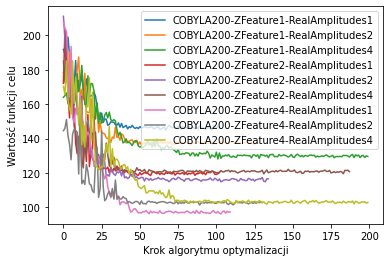

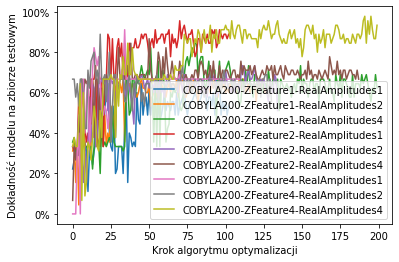

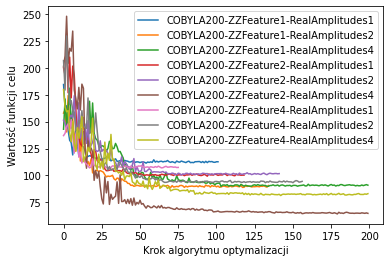

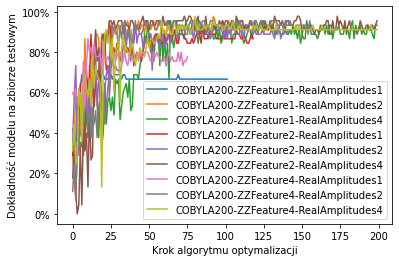

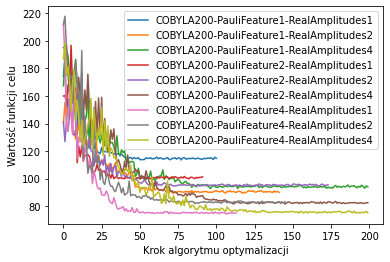

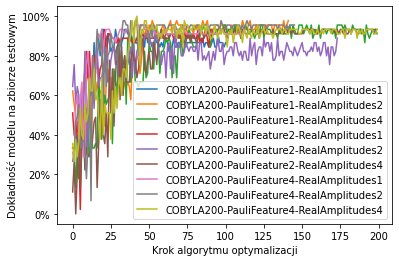

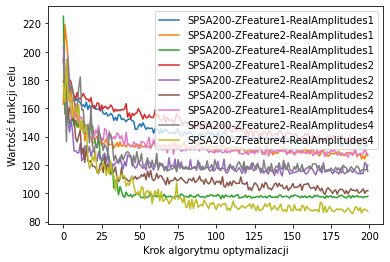

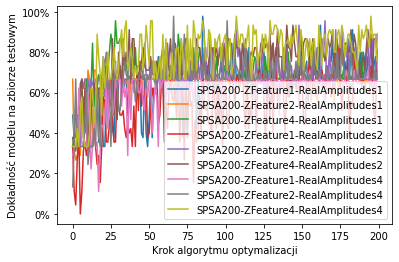

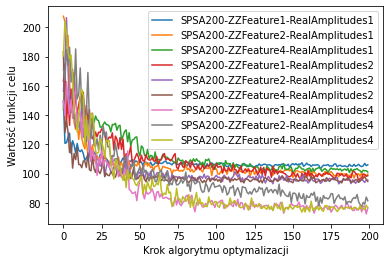

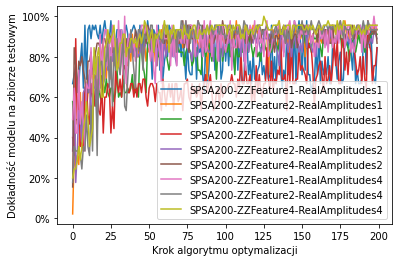

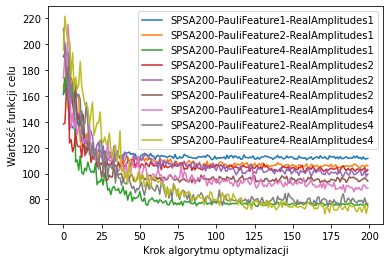

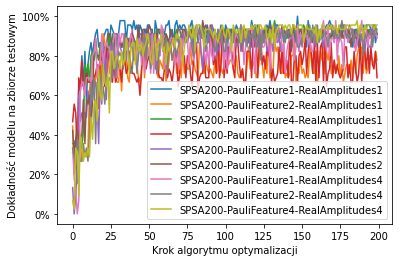

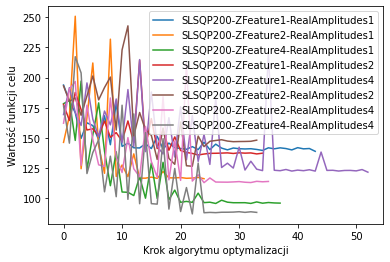

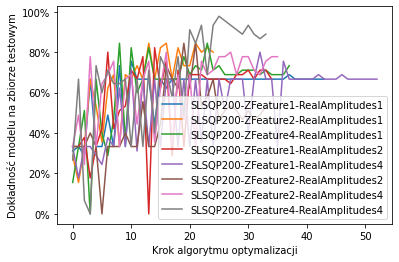

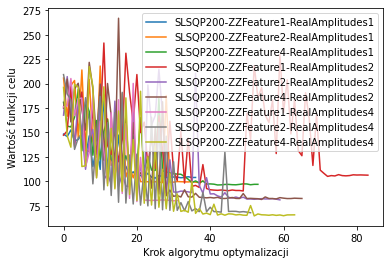

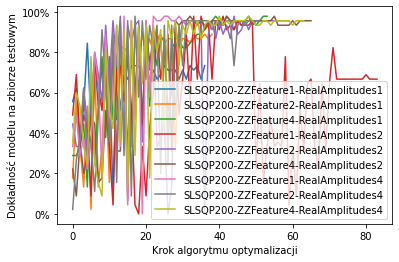

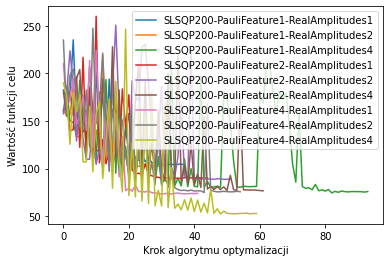

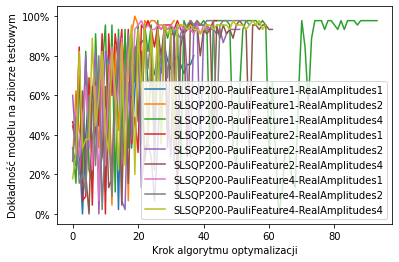

In [9]:
result_array = []

for case in cases:
    data = readData("./data/" + case + ".csv")
    for index, row in data.iterrows():
        obj_func = eval(row['Objective Function Values Evolution'])
        accuracy = eval(row['Accuracy Evolution'])
        name = row['Name']
        result_array.append([name, obj_func[-1], accuracy[-1]])
        print(name, obj_func[-1], accuracy[-1])

#     print(obj_func[-1])
#     print(accuracy[-1])
    plotObjFuncAll(data, case)
    plotAccuracyAll(data, case)

In [6]:
def takeSecond(elem):
    return elem[2]

result_array.sort(key=takeSecond, reverse=True)

In [7]:
for case in result_array:
    print(case[0], case[1], case[2])

COBYLA200-PauliFeature1-RealAmplitudes2 89.95645090399294 0.9777777777777777
SLSQP200-ZZFeature4-RealAmplitudes1 96.90720843770299 0.9777777777777777
SLSQP200-PauliFeature1-RealAmplitudes2 102.65923636411047 0.9777777777777777
SLSQP200-PauliFeature1-RealAmplitudes4 75.9190915902536 0.9777777777777777
SLSQP200-PauliFeature2-RealAmplitudes1 90.07695849633065 0.9777777777777777
COBYLA200-ZZFeature2-RealAmplitudes4 64.60466037806017 0.9555555555555556
COBYLA200-PauliFeature4-RealAmplitudes2 83.2131819000938 0.9555555555555556
SPSA200-ZZFeature1-RealAmplitudes4 71.20925235356117 0.9555555555555556
SPSA200-ZZFeature2-RealAmplitudes4 75.06197753520496 0.9555555555555556
SPSA200-ZZFeature4-RealAmplitudes4 70.0135782776132 0.9555555555555556
SLSQP200-ZZFeature2-RealAmplitudes2 80.98605519490309 0.9555555555555556
SLSQP200-ZZFeature4-RealAmplitudes2 82.41452400345572 0.9555555555555556
SLSQP200-ZZFeature2-RealAmplitudes4 67.85749772959309 0.9555555555555556
SLSQP200-ZZFeature4-RealAmplitudes4 65

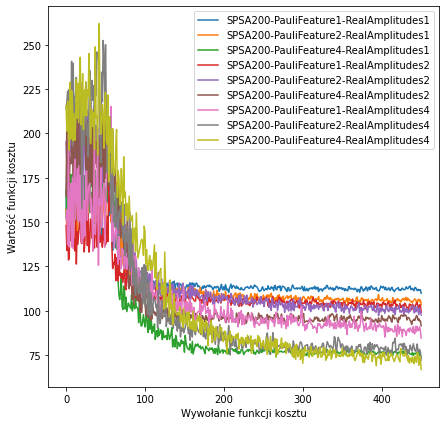

In [47]:
plotObjFuncAll(data, 'SPSA_PAULI')

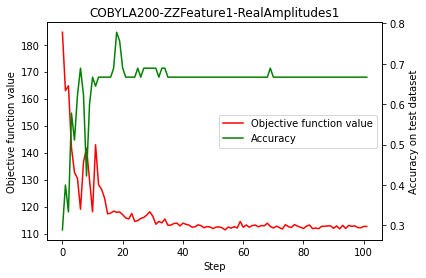

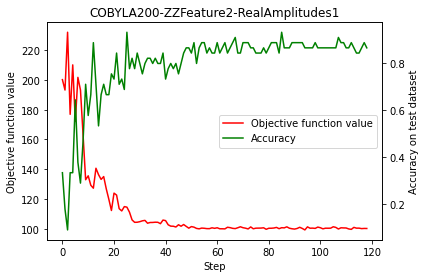

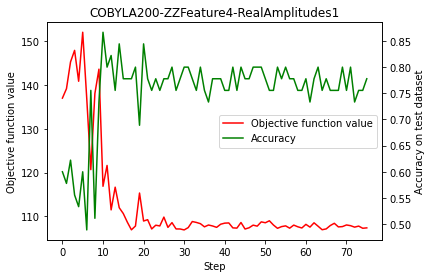

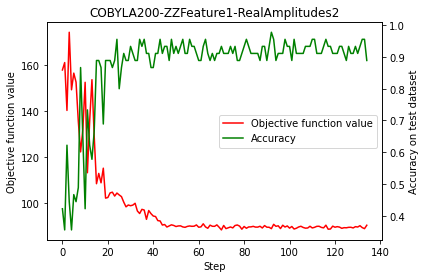

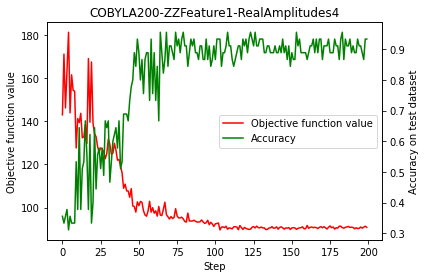

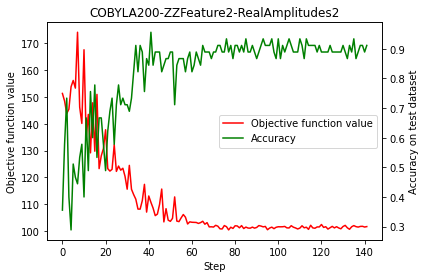

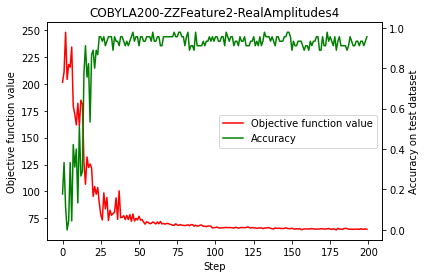

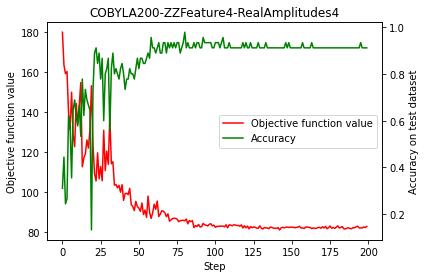

In [51]:
for index, row in data.iterrows():
    obj_func = eval(row['Objective Function Values Evolution'])
    accuracy = eval(row['Accuracy Evolution'])
    weights = row['Weights Evolution']
    name = row['Name']
    plotData(name, obj_func, accuracy)

In [68]:
data = readData("SLSQP_Z.csv")

SLSQP200-ZFeature1-RealAmplitudes1 0.6666666666666666
SLSQP200-ZFeature2-RealAmplitudes1 0.8
SLSQP200-ZFeature4-RealAmplitudes1 0.7333333333333333
SLSQP200-ZFeature1-RealAmplitudes2 0.6666666666666666
SLSQP200-ZFeature1-RealAmplitudes4 0.6666666666666666
SLSQP200-ZFeature2-RealAmplitudes2 0.5333333333333333
SLSQP200-ZFeature2-RealAmplitudes4 0.7777777777777778
SLSQP200-ZFeature4-RealAmplitudes4 0.8888888888888888


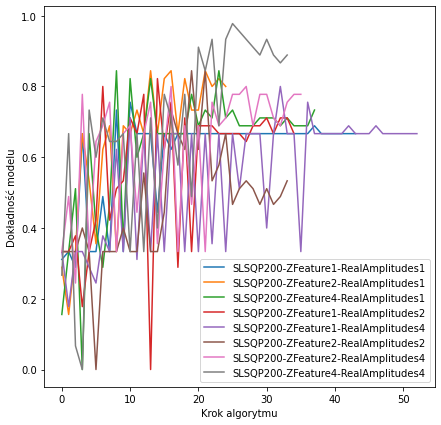

In [69]:
plotAccuracyAll(data)

No handles with labels found to put in legend.


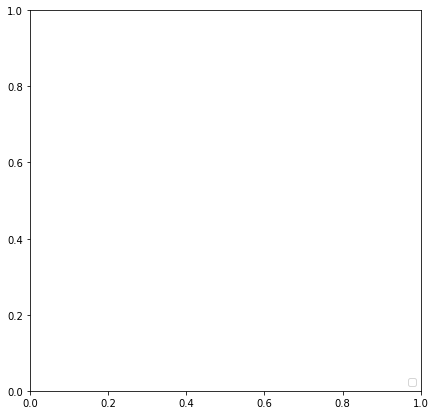

In [70]:
bestcases = ["SPSA200-ZZFeature1-RealAmplitudes4", "SPSA200-ZZFeature2-RealAmplitudes4", "SPSA200-ZZFeature4-RealAmplitudes4", "SPSA200-PauliFeature2-RealAmplitudes1", "SPSA200-PauliFeature1-RealAmplitudes4", "SPSA200-PauliFeature2-RealAmplitudes4"]
best_result_data = data[data.Name.isin(bestcases)]
plotAccuracyAll(best_result_data)

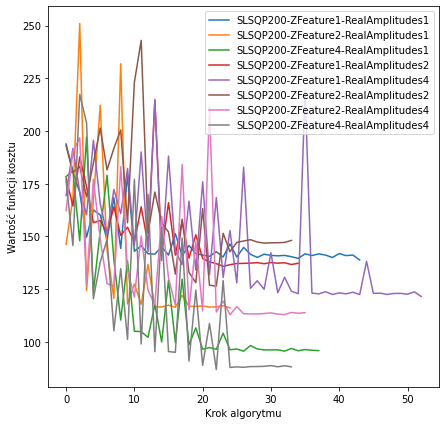

In [71]:
plotObjFuncAll(data)

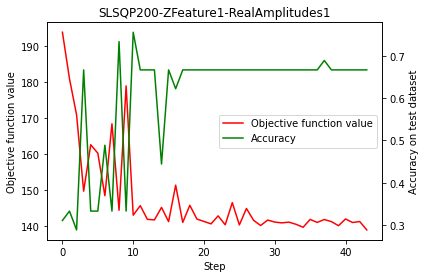

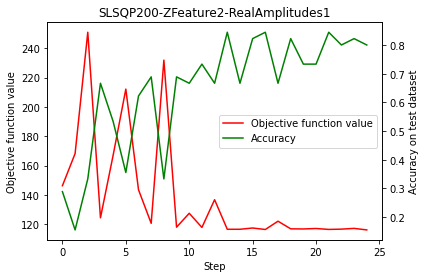

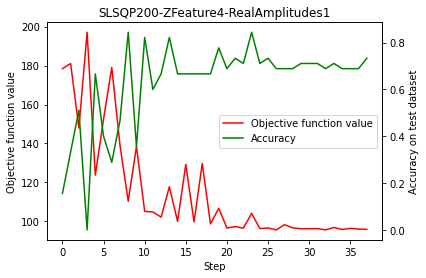

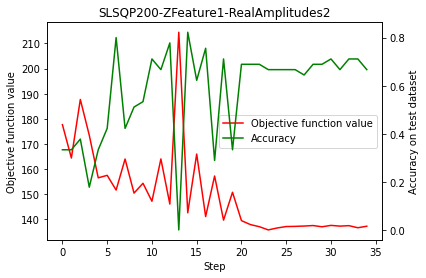

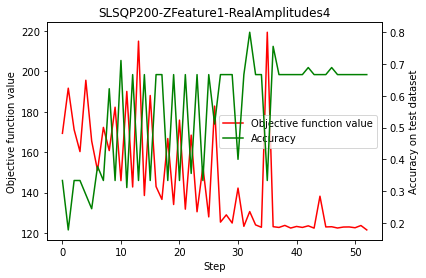

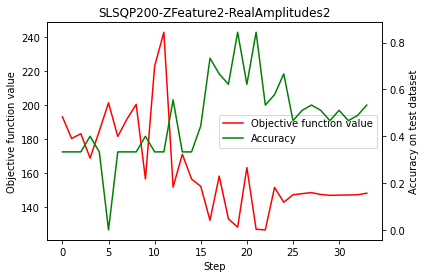

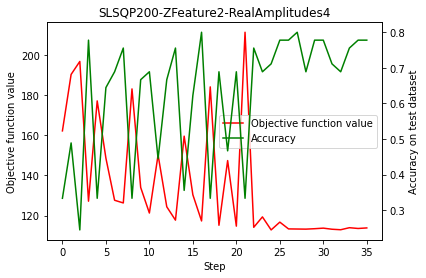

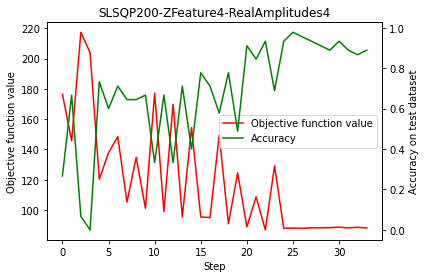

In [72]:
for index, row in data.iterrows():
    obj_func = eval(row['Objective Function Values Evolution'])
    accuracy = eval(row['Accuracy Evolution'])
    weights = row['Weights Evolution']
    name = row['Name']
    plotData(name, obj_func, accuracy)